# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 27. 4 2022. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohla být korelace (dvojice typu Age upon Intake a Age upon Outcome neuznáváme) a popište jejich vztah pomocí bivariačních deskriptivních statistik.

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Income Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

## Řešení

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

### Seznámení s daty
Nejdřív se podívám na dataset *intakes*

In [2]:
intakes = pd.read_csv('intakes.csv')
display(intakes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


None

Výše můžu vidět, že dataset má 138585 řádků a 12 různých sloupců (příznaků). Podívám se na pár hodnot abych lépe pochopil, jak jednotlivé příznaky vypadají. Také zjistím které příznaky jsou unikátní a kde jsou chybějící data.

In [3]:
display(intakes.head())
print("Number of unique values:")
display(intakes.nunique())
print("Number of null values:")
display(intakes.isnull().sum())
print("Intake Type values:")
display(intakes["Intake Type"].unique())
print("Intake Condition values:")
display(intakes["Intake Condition"].unique())
print("Animal Type values:")
display(intakes["Animal Type"].unique())
print("Sex upon Intake values:")
display(intakes["Sex upon Intake"].unique())

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


Number of unique values:


Animal ID           123890
Name                 23544
DateTime             97442
MonthYear              103
Found Location       58367
Intake Type              6
Intake Condition        15
Animal Type              5
Sex upon Intake          5
Age upon Intake         54
Breed                 2741
Color                  616
dtype: int64

Number of null values:


Animal ID               0
Name                41269
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         1
Age upon Intake         0
Breed                   0
Color                   0
dtype: int64

Intake Type values:


array(['Stray', 'Owner Surrender', 'Public Assist', 'Wildlife',
       'Euthanasia Request', 'Abandoned'], dtype=object)

Intake Condition values:


array(['Normal', 'Sick', 'Injured', 'Pregnant', 'Nursing', 'Aged',
       'Medical', 'Other', 'Neonatal', 'Feral', 'Behavior', 'Med Urgent',
       'Space', 'Med Attn', 'Panleuk'], dtype=object)

Animal Type values:


array(['Dog', 'Cat', 'Other', 'Bird', 'Livestock'], dtype=object)

Sex upon Intake values:


array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown', nan], dtype=object)

Dataset *intakes* obsahuje tyto příznaky:
* Animal ID - Unikátní identifikátor zvířete. V datech se sice opakuje, ale to bude nejspíš tím, že se stejné zvíře do útulku vrátilo.
* Name - Jméno zvířete. Je vidět, že zvířata mají občas stejná jména a některým zvířatům jméno chybí.
* DateTime - Datum a čas přijetí zvířete do útulku.
* MonthYear - Měsíc a rok přijetí zvířete do útulku. Tento příznak bude redundantní a později ho odstraním.
* Found Location - Místo, kde bylo zvíře nalezeno. Vypadá to, že většinou obsahuje přesnou adresu, ale občas pouze město.
* Intake Type - Jakým způsobem se zvíře dostalo do útulku. Nabývá pouze 5 unikátních hodnot, které lze vidět výše.
* Intake Condition - Stav zvířete při přijetí do útulku. Nabývá 15 různých hodnot viz. výše.
* Animal Type - Druh zvířete. Útulek rozlišuje pouze 5 typů zvířat - pes, kočka, pták, hospodářská zvířata a ostatní.
* Sex upon Intake - Příznak vypovídá o pohlaví zvířete a jestli bylo dané zvíře kastrováno nebo ne. Sloupec obsahuje jednu chybějící hodnotu ale i hodoty unknown.
* Age upon Intake - Věk zvířete při přijetí do útulku.
* Breed - Plemeno zvířete.
* Color - Barva zvířete.

Nyní se podívám na druhý dataset - outcomes

In [4]:
outcomes = pd.read_csv("outcomes.csv")
display(outcomes.info())
display(outcomes.head())
print("Number of unique values:")
display(outcomes.nunique())
print("Number of null values:")
display(outcomes.isnull().sum())
print("Outcome Type values:")
display(outcomes["Outcome Type"].unique())
print("Outcome Subtype values:")
display(outcomes["Outcome Subtype"].unique())
print("Animal Type values:")
display(outcomes["Animal Type"].unique())
print("Sex upon Outcome values:")
display(outcomes["Sex upon Outcome"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


None

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


Number of unique values:


Animal ID           124068
Name                 23425
DateTime            115364
MonthYear              103
Date of Birth         7576
Outcome Type             9
Outcome Subtype         26
Animal Type              5
Sex upon Outcome         5
Age upon Outcome        54
Breed                 2749
Color                  619
dtype: int64

Number of null values:


Animal ID               0
Name                41255
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           23
Outcome Subtype     75334
Animal Type             0
Sex upon Outcome        1
Age upon Outcome        5
Breed                   0
Color                   0
dtype: int64

Outcome Type values:


array(['Rto-Adopt', 'Adoption', 'Euthanasia', 'Transfer',
       'Return to Owner', 'Died', 'Disposal', 'Missing', 'Relocate', nan],
      dtype=object)

Outcome Subtype values:


array([nan, 'Partner', 'Foster', 'SCRP', 'Out State', 'Suffering',
       'Underage', 'Snr', 'Rabies Risk', 'In Kennel', 'Offsite',
       'Aggressive', 'Enroute', 'At Vet', 'In Foster', 'Behavior',
       'Medical', 'Field', 'Possible Theft', 'Barn', 'Customer S',
       'Court/Investigation', 'Emer', 'In Surgery', 'Prc', 'Emergency',
       'In State'], dtype=object)

Animal Type values:


array(['Cat', 'Dog', 'Other', 'Bird', 'Livestock'], dtype=object)

Sex upon Outcome values:


array(['Neutered Male', 'Unknown', 'Intact Male', 'Spayed Female',
       'Intact Female', nan], dtype=object)

Dataset *outcomes* je velmi podobný datasetu *intakes*, ale některé příznaky jsou nahrazeny jinými. Obsahuje také více záznamů než *intakes*. To bude způsobeno pravděpodobně tím, že v době, kdy se data začala zaznamenávat, v útulku již nějaká zvířata byla.
Příznaky v datasetu *outcomes*:
* Animal ID - Stejné jako v *Intakes*.
* Name - Stejné jako v *Intakes*.
* DateTime - Datum a čas odchodu zvířete z útulku. Formát stejný jako v *intakes*.
* MonthYear - Měsíc a rok odchodu zvířete z útulku. Formát opět stejný jako v *intakes*.
* Date of Birth - Datum narození zvířete.
* Outcome Type - Důvod opuštění útulku (adopce, smrt, navrácení majiteli...). Ve 23 záznamech chybí.
* Outcome Subtype - Doplnění k důvodu výše. Často chybí.
* Animal Type - Stejné jako v *Intakes*
* Sex upon Outcome - Pohlaví při odchodu zvířete z útulku a jestli bylo kastrováno nebo ne. Jedna hodnota chybí.
* Age upon Outcome - Věk zvířete při odchodu z útulku.
* Breed - Stejné jako v *Intakes*
* Color - Stejné jako v *Intakes*

Všechny příznaky (v obou datasetech) jsou typu o´*object*. To budu také muset upravit.

### Příprava dat
**Chybějící hodnoty** - Jak je vidět výše, v datasetech se vyskytují už jako *nan*, tedy s nimi nemusím nic dělat. U některých příznaků (například *Sex upon Outcome*) se vyskytují hodnoty *unknown*, které by někdo mohl považovat za chybějící hodnoty. Podle mě mají ale jiný význam (např. o pohlaví nešlo rozhodnout) a za chybějící hodnoty je nepovažuji.

**Duplicitní hodnoty** - V zadání je řečeno, že dataset může obsahovat duplicitní hodnoty. Zkusím je tedy odstranit.

In [5]:
print(f'Intakes size before: {len(intakes.index)}')
intakes.drop_duplicates(inplace=True)
print(f'Intakes size after: {len(intakes.index)}')
print(f'Outcomes size before: {len(outcomes.index)}')
outcomes.drop_duplicates(inplace=True)
print(f'Outcomes size after: {len(outcomes.index)}')

Intakes size before: 138585
Intakes size after: 138565
Outcomes size before: 138769
Outcomes size after: 138752


V obou datasetech se několik duplicitních hodnot opravdu vyskytovalo a byly odstraněny.

**Přetypování příznaků** - Jak už jsem psal výše, všechny příznaky jsou typu "object" a proto je budu muset převést na správný typ.
* *DateType, Date of Birth* - Příznaky udávají čas, převedu je proto na *datetime64*.

In [6]:
intakes["DateTime"]=pd.to_datetime(intakes["DateTime"])
outcomes["DateTime"]=pd.to_datetime(outcomes["DateTime"])
outcomes["Date of Birth"]=pd.to_datetime(outcomes["Date of Birth"])

* *MonthYear* - Příznak je redundantní, stejnou informaci o času již obsahuje příznak *DateTime*, proto ho z obou datasetů odstraním.

In [7]:
intakes.drop("MonthYear", axis=1, inplace=True)
outcomes.drop("MonthYear", axis=1, inplace=True)

* *Name, Found Location, Intake/Outcome Type, Outcome Subtype, Intake Condition, Animal Type, Sex upon Intake/Outcome, Breed, Color* - Všechno jsou to kategorické příznaky, převedu je na typ *category*

In [8]:
to_convert_in = ["Intake Type", "Intake Condition", "Animal Type", "Sex upon Intake", "Breed", "Color", "Name", "Found Location"]
to_convert_out = ["Outcome Type", "Outcome Subtype", "Animal Type", "Sex upon Outcome", "Breed", "Color", "Name"]

intakes[to_convert_in] = intakes[to_convert_in].astype("category")
outcomes[to_convert_out] = outcomes[to_convert_out].astype("category")

* *Age upon Intake/Outcome* - Převedu na numeriké příznaky. Problém je, že věk je reprezentován pomocí čísla a řetězce, takže si budu muset vytvotvořit nějakou vlastní funkci, kterou ho převedu na jedno číslo. Budu všechno převádět na dny, protože menší jednotka času se v těchto sloupcí nevyskytuje.

In [9]:
def age_to_numeric(age_col):
    new_col = []
    for row in age_col:
        #do nothing with missing values
        if pd.isnull(row):
            new_col.append(np.nan)
            continue
        #split string into number and time unit
        num, time_string = row.split(" ")
        #convert to days accordingly
        if "day" in time_string:
            new_col.append(int(num))
        elif "week" in time_string:
            new_col.append(int(num) * 7)
        elif "month" in time_string:
            new_col.append(int(num) * 30)
        elif "year" in time_string:
            new_col.append(int(num) * 365)
        else: raise Exception("Invalid age format")
    return new_col

In [10]:
intakes["Age upon Intake"] = age_to_numeric(intakes["Age upon Intake"])
outcomes["Age upon Outcome"] = age_to_numeric(outcomes["Age upon Outcome"])

In [11]:
display(intakes["Age upon Intake"].head())
display(intakes["Age upon Intake"].dtypes)
display(outcomes["Age upon Outcome"].head())
display(outcomes["Age upon Outcome"].dtypes)
#test if there are any negative values
display(intakes[intakes["Age upon Intake"] < 0])
display(outcomes[outcomes["Age upon Outcome"] < 0])

0     730
1    2920
2     330
3      28
4    1460
Name: Age upon Intake, dtype: int64

dtype('int64')

0    730.0
1    365.0
2    365.0
3    120.0
4      6.0
Name: Age upon Outcome, dtype: float64

dtype('float64')

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
12599,A687107,Montopolis,2017-10-04 10:22:00,East Riverside Drive And Montopolis Drive in A...,Stray,Normal,Dog,Neutered Male,-365,Rhod Ridgeback,Red/Brown
49643,A797495,Ace,2019-06-14 11:34:00,6814 East Riverside Drive in Austin (TX),Stray,Normal,Dog,Neutered Male,-365,Cairn Terrier,Black/Tan
59806,A687107,Montopolis,2017-06-19 13:26:00,7140 E Ben White in Austin (TX),Stray,Normal,Dog,Neutered Male,-365,Rhod Ridgeback,Red/Brown
77603,A757376,Gorda,2017-09-01 16:49:00,6807 Blue Dawn Trl in Austin (TX),Stray,Normal,Dog,Intact Female,-730,Miniature Schnauzer Mix,White
81295,A753893,Chato,2015-06-26 16:30:00,6709 Ponca Street in Austin (TX),Stray,Normal,Dog,Intact Male,-365,American Bulldog Mix,White/Brown
93575,A687107,Montopolis,2018-02-27 17:00:00,400 West Parson in Manor (TX),Stray,Normal,Dog,Neutered Male,-365,Rhod Ridgeback,Red/Brown
102222,A687107,Montopolis,2016-02-12 00:58:00,1005 Valdez St in Austin (TX),Stray,Normal,Dog,Neutered Male,-1095,Rhod Ridgeback,Red/Brown
123269,A757376,Gorda,2018-10-13 13:42:00,Austin (TX),Public Assist,Normal,Dog,Spayed Female,-365,Miniature Schnauzer Mix,White


,Animal ID,Name,DateTime,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
9362,A757376,Gorda,2017-09-05 19:25:00,2019-11-05,Rto-Adopt,NaN,Dog,Spayed Female,-730.0,Miniature Schnauzer Mix,White
60898,A757376,Gorda,2018-10-21 19:01:00,2019-11-05,Return to Owner,NaN,Dog,Spayed Female,-365.0,Miniature Schnauzer Mix,White
74596,A687107,Montopolis,2018-02-28 11:18:00,2019-03-17,Return to Owner,NaN,Dog,Neutered Male,-365.0,Rhod Ridgeback,Red/Brown
76016,A797495,Ace,2019-06-15 12:44:00,2020-12-16,Return to Owner,NaN,Dog,Neutered Male,-365.0,Cairn Terrier,Black/Tan
94184,A687107,Montopolis,2017-06-25 12:20:00,2019-03-17,Rto-Adopt,NaN,Dog,Neutered Male,-365.0,Rhod Ridgeback,Red/Brown
94555,A687107,Montopolis,2017-10-04 17:57:00,2019-03-17,Return to Owner,NaN,Dog,Neutered Male,-365.0,Rhod Ridgeback,Red/Brown
100975,A687107,Montopolis,2016-02-25 18:04:00,2019-03-17,Return to Owner,NaN,Dog,Neutered Male,-1095.0,Rhod Ridgeback,Red/Brown
116372,A753893,Chato,2015-07-02 11:06:00,2016-07-12,Transfer,Partner,Dog,Intact Male,-365.0,American Bulldog Mix,White/Brown


Příznaky se povedlo převést na numerické. Mají sice kvůli chybějícím hodnotám typ *float* a ne *int*, ale to ničemu nevadí.

Při kontrole ale zjišťuji, že se v datasetech vyskytují záporné věky zvířat. To nedává moc smysl. Znamená to, že zvíře mělo špatně uvedené datum narození (až po příchodu do útulku), jak lze vidět v datasetu *Outcomes*. Zjistit opravdové datum narození nedokážu, a proto ho spolu s věkem zvířete nastavím v příslušných řádcích na *NaN*.

In [12]:
intakes.loc[intakes["Age upon Intake"] < 0, ["Age upon Intake"]] = np.nan
outcomes.loc[outcomes["Age upon Outcome"] < 0, ["Date of Birth"]] = np.nan
outcomes.loc[outcomes["Age upon Outcome"] < 0, ["Age upon Outcome"]] = np.nan

display(intakes.dtypes)
display(outcomes.dtypes)

Animal ID                   object
Name                      category
DateTime            datetime64[ns]
Found Location            category
Intake Type               category
Intake Condition          category
Animal Type               category
Sex upon Intake           category
Age upon Intake            float64
Breed                     category
Color                     category
dtype: object

Animal ID                   object
Name                      category
DateTime            datetime64[ns]
Date of Birth       datetime64[ns]
Outcome Type              category
Outcome Subtype           category
Animal Type               category
Sex upon Outcome          category
Age upon Outcome           float64
Breed                     category
Color                     category
dtype: object

Pro kontrolu se podívám znovu na typy příznaků a vidím, že všechny typu už odpovídají.

### Deskriptivní statistiky
Nejdříve popíši *Age upon Intake* a *DateTime* pomocí univariačních statistik. Pomůžu si funkcí z notebooku *eda_heart_attack* ze cvičení, kterou si trochu upravím.

**Age upon Intake**

Data zde mají hodně velký rozptyl, proto použiji logaritmické měřítko, aby na grafu bylo vůbec něco vidět.

Age upon Intake statistics:


,Title,Value
0,Minimal value,0.0
1,Maximal value,10950.0
2,Range,10950.0
3,Average,898.0246682632514
4,Median,365.0
5,Lower quartile,120.0
6,Upper quartile,1095.0
7,Skewness,2.001077163998143
8,Kurtosis,4.161364565463644
9,Variance,1283130.4122602134


[Text(0.5, 1.0, 'Age distribution'), Text(0, 0.5, 'Age upon Intake (days)')]

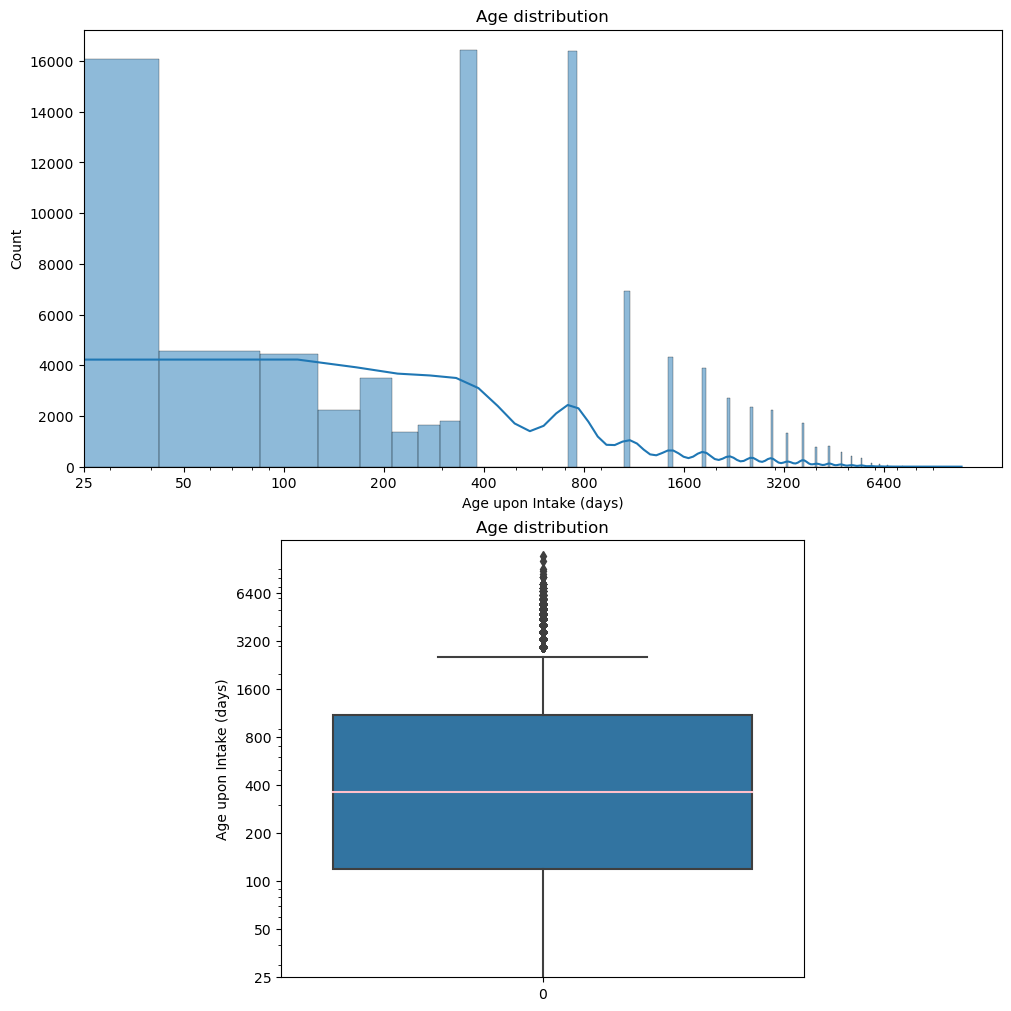

In [13]:
print("Age upon Intake statistics:")

age = intakes.dropna()["Age upon Intake"]
# create new dataframe with statistics
stats_df = pd.DataFrame(np.array([
    ["Minimal value", age.min()], 
    ["Maximal value", age.max()], 
    ["Range", age.max() - age.min()],
    ["Average", age.mean()],
    ["Median", age.median()],
    ["Lower quartile", age.quantile(q=0.25)],
    ["Upper quartile", age.quantile(q=0.75)],
    ["Skewness", scipy.stats.skew(age)],
    ["Kurtosis", scipy.stats.kurtosis(age)],
    ["Variance", age.var()]
]), columns=['Title', 'Value'])

display(stats_df)

# figure layout initialization with two subplots
fig = plt.figure(figsize=(10,10), constrained_layout=True)
spec = gridspec.GridSpec(ncols=5, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec[0, :]) 
ax2 = fig.add_subplot(spec[1, 1:4])

# plot graphs
g1 = sns.histplot(data=age, kde=True, ax=ax1)
g2 = sns.boxplot(data=age, ax=ax2, medianprops={"color": "pink"})

#add labels and logarithmic scale
ticks = [25, 50, 100, 200, 400, 800, 1600, 3200, 6400]
g1.set_xscale("log")
g1.set_xticks(ticks)
g1.set_xticklabels(ticks)
g1.set(title="Age distribution", xlabel="Age upon Intake (days)")
g2.set_yscale("log")
g2.set_yticks(ticks)
g2.set_yticklabels(ticks)
g2.set(title="Age distribution", ylabel="Age upon Intake (days)")

Věky zvířat při přijetí do útulku se pohybují mezi 0 a 10950 dny (0 - 30 let). 0 let budou zvířata, co se narodily již v útulku. Ze statistik nahoře a boxplotu je vidět, že mezikvartilové rozpětí je 120 - 1095 dnů a medián je 1 rok. S tím souvisí i velmi vysoká variance a hodně odlehlých hodnot. To je vidět například i z průměru, který je skoro třikrát vyšší než medián.

**DateTime**

DateTime statistics:


,Title,Value
0,Minimal value,2013-10-01 07:51:00
1,Maximal value,2022-04-27 07:54:00
2,Range,3130 days 00:03:00
3,Average,2017-09-25 01:47:02.187458304
4,Median,2017-07-27 12:40:00
5,Lower quartile,2015-08-25 17:18:30
6,Upper quartile,2019-08-08 10:43:30


[Text(0.5, 1.0, 'Distribution of intakes over time')]

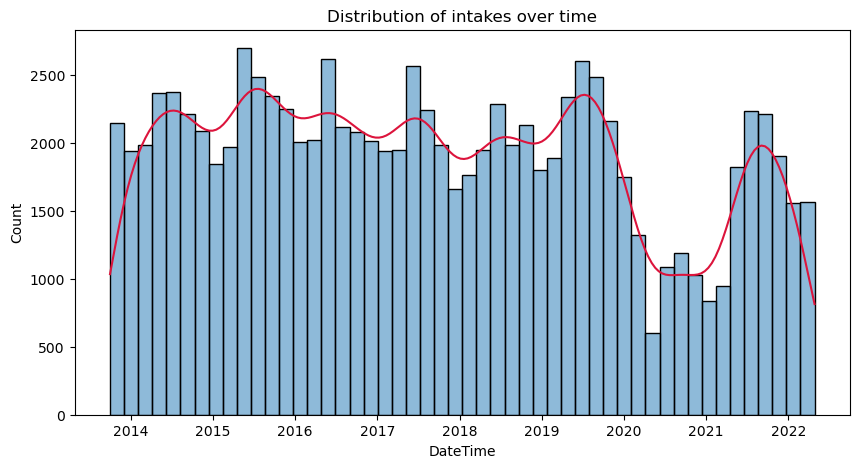

In [14]:
print("DateTime statistics:")
date = intakes.dropna()["DateTime"]
# create new dataframe with statistics
stats_df = pd.DataFrame(np.array([
    ["Minimal value", date.min()], 
    ["Maximal value", date.max()], 
    ["Range", date.max() - date.min()],
    ["Average", date.mean()],
    ["Median", date.median()],
    ["Lower quartile", date.quantile(q=0.25)],
    ["Upper quartile", date.quantile(q=0.75)],
]), columns=['Title', 'Value'])

display(stats_df)

fig = plt.figure(figsize=(10, 5))

# plot graph
g1 = sns.histplot(data=date, kde=True)
#change color to red and add title
g1.lines[0].set_color('crimson')
g1.set(title="Distribution of intakes over time")

Data se začala shromažďovat koncem roku 2013 a nejnovější jsou z dubna letošního roku.

Výška každého sloupce v grafu nám říká, kolik nových zvířat přišlo v daném časovém období do útulku. Je vidět výrazný pokles v roce 2020, nejspíše kvůli koronaviru. Také můžeme pozorovat, že každý rok je dáváno do útulku nejvíce nových zvířat přes léto (sloupce uprostřed roku, jsou vyšší, než sloupce na krajích).

**Animal Type**

Teď se podívám na druhy zvířat, které přicházejí do útulku. Využiji opět funkci z notebooku ze cvičení, kterou si trochu upravím.

In [15]:
# univariate descriptive statistics for categorical data
def univariate_cat_ds(df, column, pie=True):
    stats_df = pd.DataFrame(data={
        'Frequency': df[column].value_counts(),
        'Relative frequency': df[column].value_counts(normalize=True) 
    })
    
    display(stats_df)
    print(f"Modus: {df[column].mode()}")
    #plots either two graphs or one
    if pie:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

        sns.countplot(data=df, x=column, order = df[column].value_counts().index, ax=ax1)
        # adds labels above bars
        ax1.bar_label(ax1.containers[0])
        ax2.pie(stats_df['Frequency'], labels=stats_df.index, autopct='%1.1f%%')
    else:
        fig, ax1 = plt.subplots(figsize=(11,5))

        sns.countplot(data=df, x=column, order = df[column].value_counts().index, ax=ax1)
        # adds labels above bars
        ax1.bar_label(ax1.containers[0])

,Frequency,Relative frequency
Dog,65493,0.673166
Cat,30561,0.314119
Other,1088,0.011183
Bird,146,0.001501
Livestock,3,0.000031


Modus: 0    Dog
Name: Animal Type, dtype: category
Categories (5, object): ['Bird', 'Cat', 'Dog', 'Livestock', 'Other']


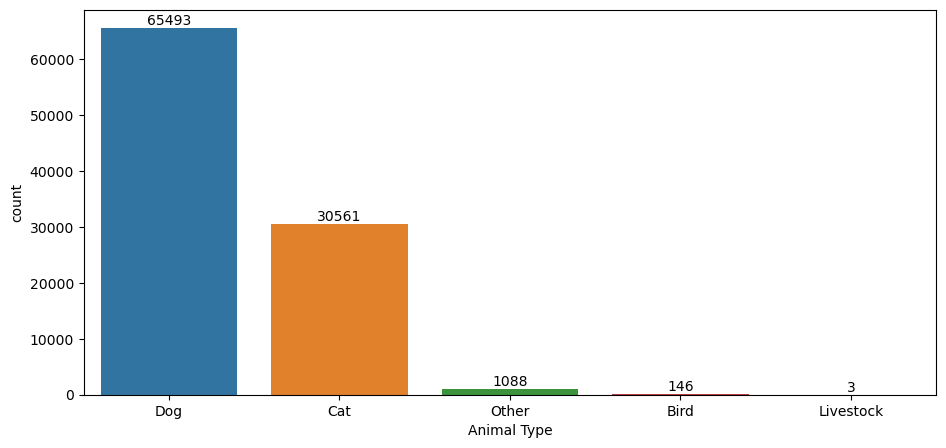

In [16]:
univariate_cat_ds(intakes.dropna(), "Animal Type", False)

Do útulku přichází nejvíce psů, za celou dobu jich útulkem prošlo přes 65 tisíc (někteří vícekrát). Koček je zhruba polovina co psů a ostatních zvířat je oproti tomu zanedbatelně.

**Sex upon Intake**

,Frequency,Relative frequency
Intact Male,31664,0.325457
Intact Female,29034,0.298424
Neutered Male,19401,0.199412
Spayed Female,16678,0.171424
Unknown,514,0.005283


Modus: 0    Intact Male
Name: Sex upon Intake, dtype: category
Categories (5, object): ['Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female', 'Unknown']


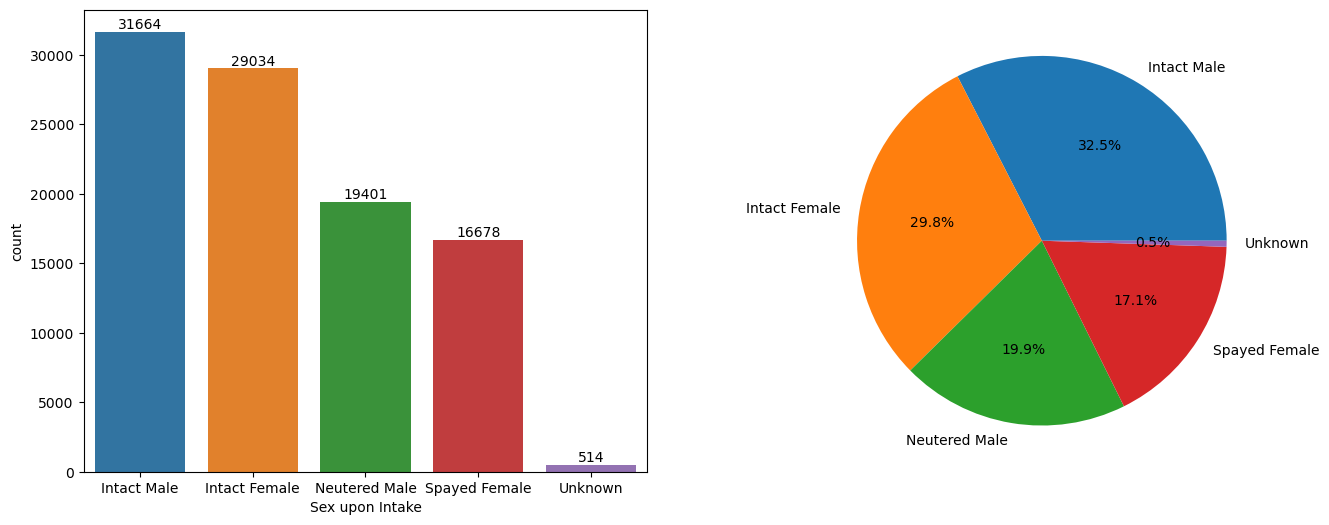

In [17]:
univariate_cat_ds(intakes.dropna(), "Sex upon Intake", True)

Zvířata, která se dostanou do útulku, jsou většinou nekastrovaná. Dohromady je pouze necelých 40% příchozích zvířat kastrovaných (19.9% kastrovaní samci a 17.1% kastrované samice). Také je vidět, že v útulku je více samců (52.4%) než samic (46.9%). Taktéž je zajímavé, že u půl procenta zvířat je stav neznámý.

**Sex upon Outcome**

,Frequency,Relative frequency
Neutered Male,11754,0.356657
Spayed Female,10868,0.329773
Intact Female,5189,0.157452
Intact Male,4788,0.145285
Unknown,357,0.010833


Modus: 0    Neutered Male
Name: Sex upon Outcome, dtype: category
Categories (5, object): ['Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female', 'Unknown']


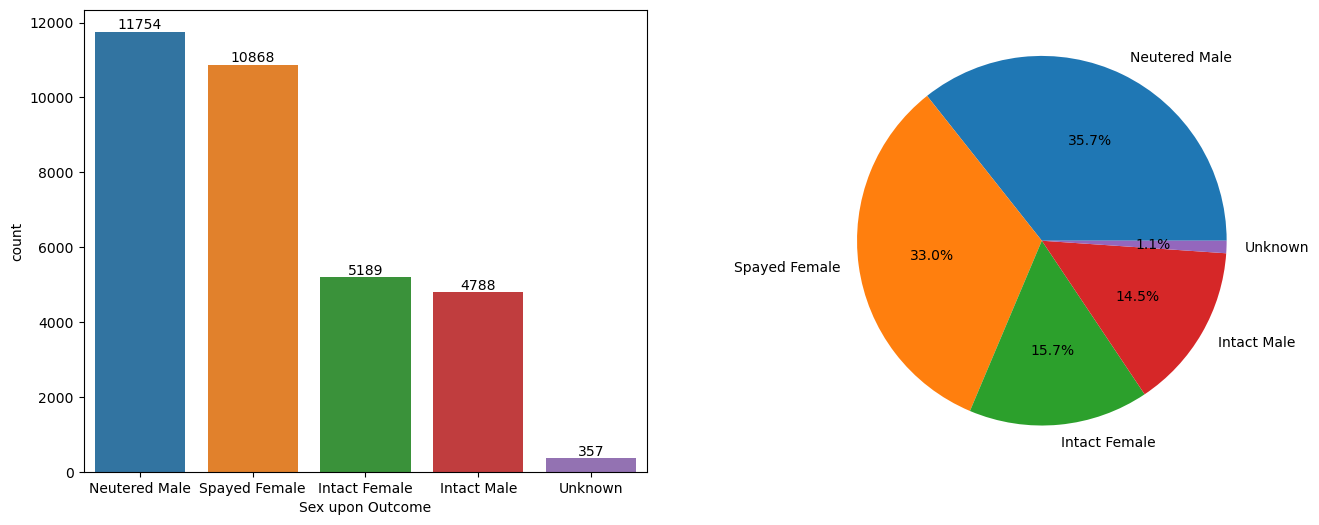

In [18]:
univariate_cat_ds(outcomes.dropna(), "Sex upon Outcome", True)

U stavu zvířat při odchodu z útulku je ale situace opačná. Většina zvířat je kastrovaná, konkrétně 68.7%. To dává smysl. V útulku je většinou nežádané aby se zvířata dále množila. Relativní počet samců a samic při odchodu zůstává podobný jako u příchodu do útulku.

**Koreluje stáří zvířete s jeho stavem při příchodu do útulku?**

Text(0, 0.5, 'Age upon Intake (days)')

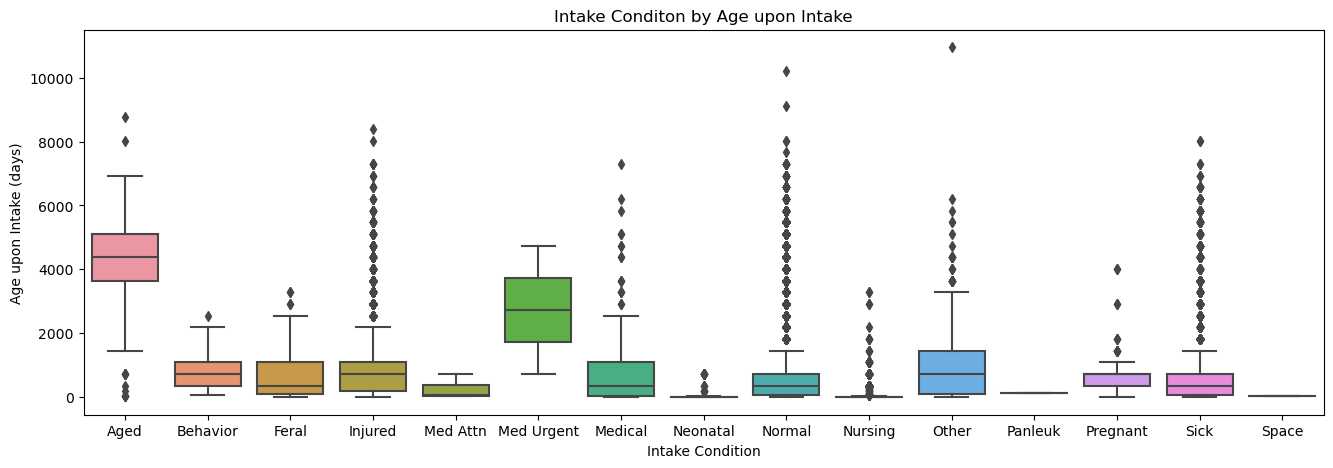

In [19]:
fig = plt.figure(figsize=(16,5))
sns.boxplot(x=intakes['Intake Condition'], y=intakes['Age upon Intake'])
plt.title('Intake Conditon by Age upon Intake');
plt.ylabel("Age upon Intake (days)")

Jak se dalo čekat, starší zvířata jsou vedená častěji jako *Aged*. Zároveň ale častěji potřebují akutní medikaci. 

A z druhé strany, starší zvířata téměř nikdy nekojí a nejsou novorozenci, což také dává smysl.
### Zadané otázky
**Závisí typ odchodu zvířete na typu příchodu?**

Pro zjednudušení odstraním zvířata, která navšívila útulek vícekrát.

[Text(0.5, 1.0, 'Relation between Outcome Type and Intake Type')]

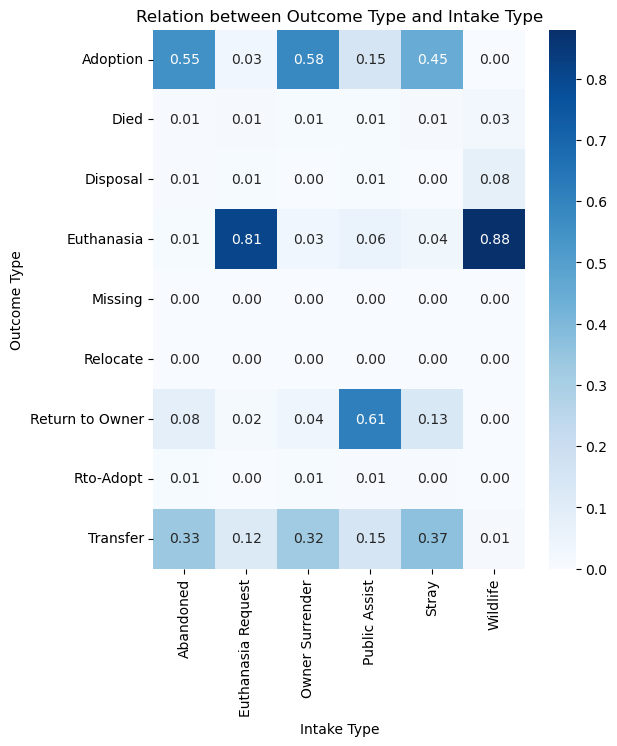

In [20]:
#Drop animals that have been in the shelter multiple times
unique_intakes = intakes.drop_duplicates(subset="Animal ID", keep=False)
unique_outcomes = outcomes.drop_duplicates(subset="Animal ID", keep=False)
#merge datasets
merged = pd.merge(unique_intakes, unique_outcomes, on="Animal ID")
#compute relative cross tabulation
freq_table = pd.crosstab(merged["Outcome Type"], merged["Intake Type"], normalize="columns")
fig = plt.figure(figsize=(6,7))
#plot heatmap
ax1 = sns.heatmap(freq_table, cmap='Blues', annot=True, fmt='.2f')
ax1.set(title="Relation between Outcome Type and Intake Type")

Z heatmapy je vidět, že sloupce na sobě opravdu závisí. Například 88% divokých zvířat (*Wildlife*), která se dostala do útulku, byla poslána na eutanázii. K eutanázii došlo i u 81% zvířat, která přišla do útulku právě kvůli ní, ale část z nich byla přesunuta jinam. Výrazná závislost je také vidět u *Public assist*, kde se 61% zvířat vrátilo zpátky k majiteli. A potom pokud se zvíře dostalo do útulku, protože bylo opuštěno nebo protože ho majitel odevzdal, tak nejčastěji (55% a 58%) bylo znovu adoptováno, anebo převezeno jinam (*Transfer* - 33% a 32%). Podobná čísla jsou i u zvířat z ulice (*Stray*), ale tam se navíc občas stává, že se zvíře vrátí zpět ke svému majiteli (13%).

**Hraje věk zvířete roli při adopci?**

Podívám se na závislost věku na příznaku *Outcome Type*.

[Text(0, 0, '')]

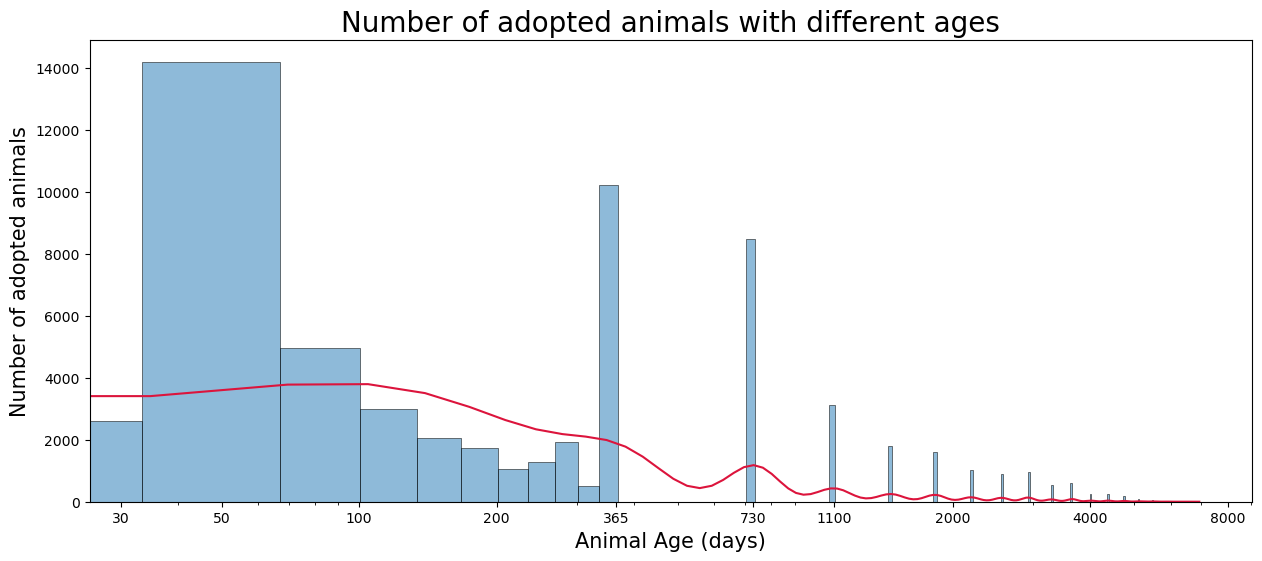

In [21]:
adopted = outcomes[outcomes['Outcome Type'] == "Adoption"]

fig = plt.figure(figsize=(15,6))
g = sns.histplot(x=adopted["Age upon Outcome"], kde=True)
g.lines[0].set_color('crimson')
plt.title('Number of adopted animals with different ages', fontsize=20);
g.set_xscale("log")
ticks = [30, 50, 100, 200, 365, 730, 1100, 2000, 4000, 8000]
g.set_xticks(ticks)
g.set_xticklabels(ticks)
plt.xlabel("Animal Age (days)", fontsize=15)
plt.ylabel("Number of adopted animals", fontsize=15)
g.bar_label(g.containers[0])

Nejvíce adoptovaných je ve věku okolo dvou měsíců. Mezi dvěma měsíci a jedním rokem je počet adoptovaných zvířat spíš nižší, ale na jednom roku zase stoupá. To bude tím, že věk zvířat v datasetu nebyl veden úplně přesně (zvíře staré 1 rok mohlo být kdekoliv mezi 365 a 729 dny staré), ale i tak je vidět, že se zvyšujícím se věkem počet adoptovaných zvířat klesá.

**Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?**

Na tuto otázku už jsem vlastně odpověděl při popisování příznaku DateTime. Tam jsem psal, že je více nových zvířat behem léta. Podívám se na data ještě jednou, ale tentokrát pouze na menší úsek na roky 2014 až 2016, abych výkyvy v průběhu roku lépe viděl.

[Text(0.5, 1.0, 'Distribution of intakes over time')]

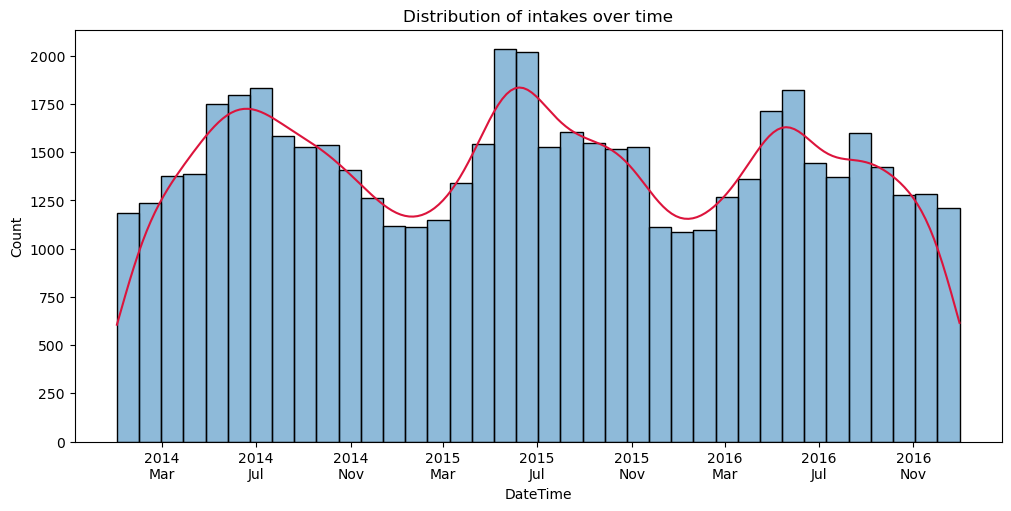

In [22]:
fig = plt.figure(figsize=(10, 5), constrained_layout=True) 

dates = intakes[intakes["DateTime"] < '2016-12-31']
dates = dates[dates["DateTime"] > "2014-01-01"]
# plot graph
g1 = sns.histplot(data=dates["DateTime"], kde=True)
g1.lines[0].set_color('crimson')
#change x axis ticks
date_form = DateFormatter("%Y\n%b")
g1.xaxis.set_major_formatter(date_form)
g1.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
g1.set(title="Distribution of intakes over time")

Nejvíce zvířat do útulku přichází v letních měsících, přibližně od května do srpna. Naopak nejmenší zátěž má útulek přes zimu.

### Vlastní otázky
**Je rozdíl ve stáří zvířat různých druhů?**


[Text(0, 0.5, 'Age upon Outcome (days)'),
 Text(0.5, 1.0, 'Animal age by their type')]

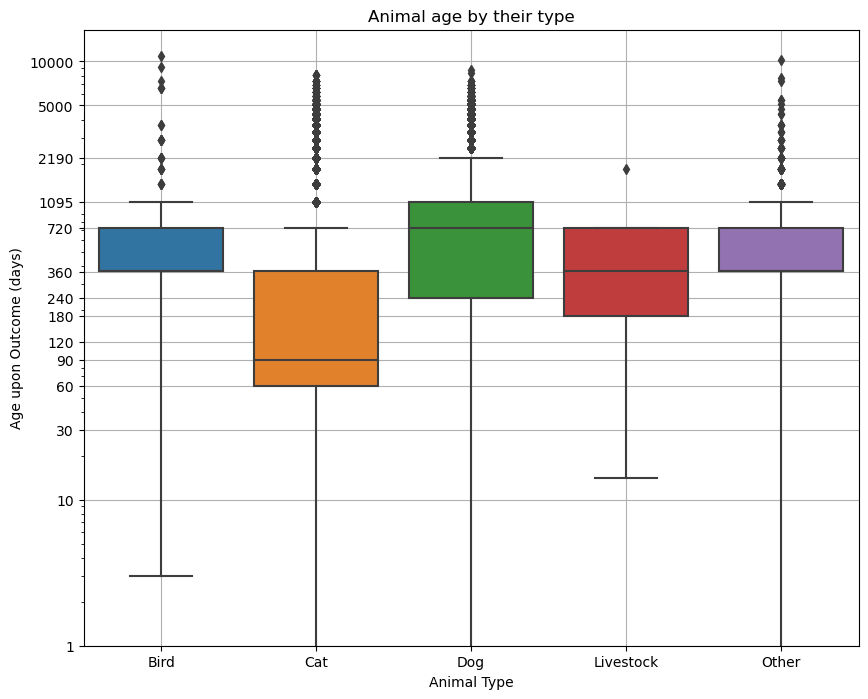

In [23]:
plt.figure(figsize=(10, 8))
ax1 = sns.boxplot(y=outcomes["Age upon Outcome"], x=outcomes["Animal Type"])
#add log scale and custom ticks so that boundaries are clear
ticks = [1, 10, 30, 60, 90, 120, 180, 240, 360, 720, 1095, 2190, 5000, 10000]
ax1.set_yscale("log")
ax1.set_yticks(ticks)
ax1.set_yticklabels(ticks)
#add grid behind plot
ax1.grid()
ax1.set_axisbelow(True)
#change lable
ax1.set(ylabel="Age upon Outcome (days)", title="Animal age by their type")

Ano, rozdíl tam je. Nejstarší jsou většinou psi, medián jejich věku je 2 roky a mezikvartilové rozpětí je 8 měsíců až 3 roky. Oproti tomu kočky mají medián pouze 3 měsíce a mezikvartilové rozpětí od dvou měsíců do jednoho roku. Domácí zvěř se nejčastěji pohybuje mezi 8 měsíci a 2 roky a ostatní zvířata mezi 1 a 2 roky.

**Jaká jsou nejčastější plemena psů v útulku?**

<AxesSubplot: title={'center': 'Distribution of the most common dog breeds'}>

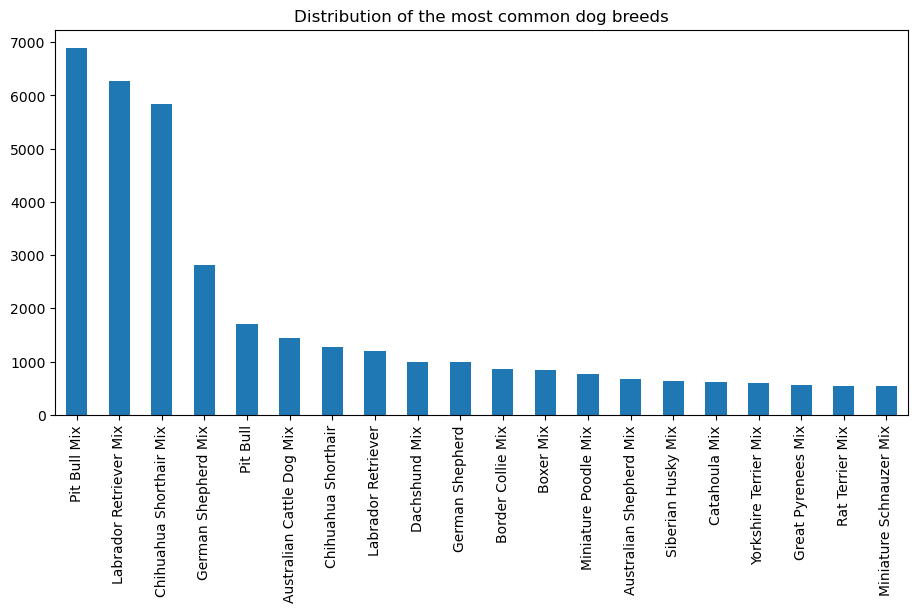

In [24]:
unique_intakes = intakes.drop_duplicates(subset="Animal ID")
dogs_df = unique_intakes[unique_intakes["Animal Type"] == "Dog"]

dogs_df["Breed"].value_counts().head(20).plot.bar(figsize=(11, 5), title="Distribution of the most common dog breeds")

Mezi psi výrazně vede Pit Bull Mix, Labrador Retriever Mix a Chihuahua Shorthair Mix. Každé z těchto plemen má více než dvojnásobek jakéhokoliv ostatního. Navíc samotný Pit Bull, Labrador Retriever i Chihuahua jsou vpodstatě hned další v pořadí. Podívám se proto ještě jak by to dopadlo, pokud bychom dohromady uvažovali i křížence.

<AxesSubplot: title={'center': 'Distribution of the most common mixed dog breeds'}>

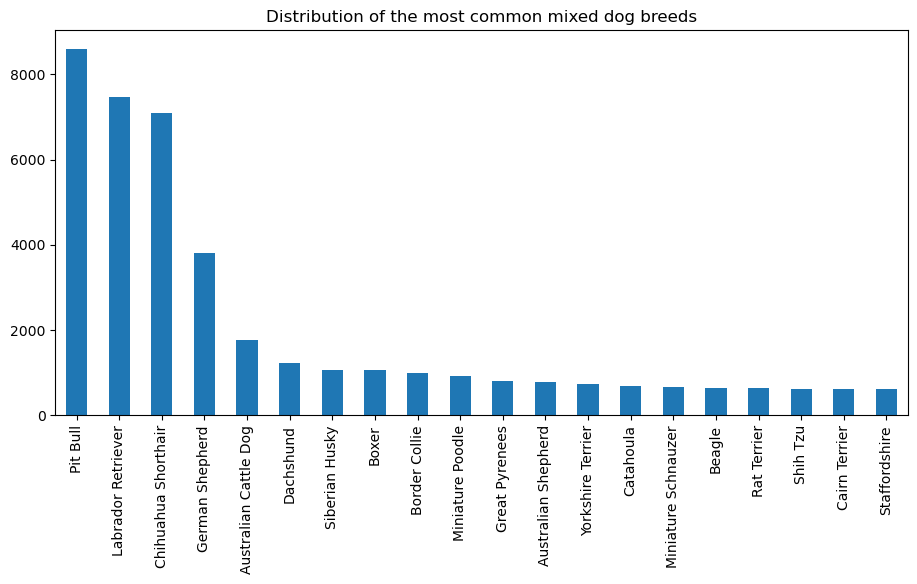

In [25]:
#copy DataFrame to prevent data damage
dogs_df_cp = dogs_df.copy()
#remove 'Mix' from breeds
dogs_df_cp['Breed'] = dogs_df_cp['Breed'].str.replace(' Mix', '')
#plot graph with title
dogs_df_cp["Breed"].value_counts().head(20).plot.bar(figsize=(11, 5), title="Distribution of the most common mixed dog breeds")

Po spojení čistokrevných plemen a kříženců se pořadí plemen nijak výrazně nezměnilo a pořád je nejvíc plemen Pit Bull, Labrador Retriever a Chihuahua Shorthar. Po nich následuje s přibližně polovičním počtem German Shepherd a pak už zbylá plemena, která se většinou pohybují pod tisícem výskytů.



**Je příjem zvířat do útulku konstantní v rámci dnů v týdnu, nebo je útulek v některé dny více vytížený?**

[Text(0.5, 1.0, 'Week days distribution')]

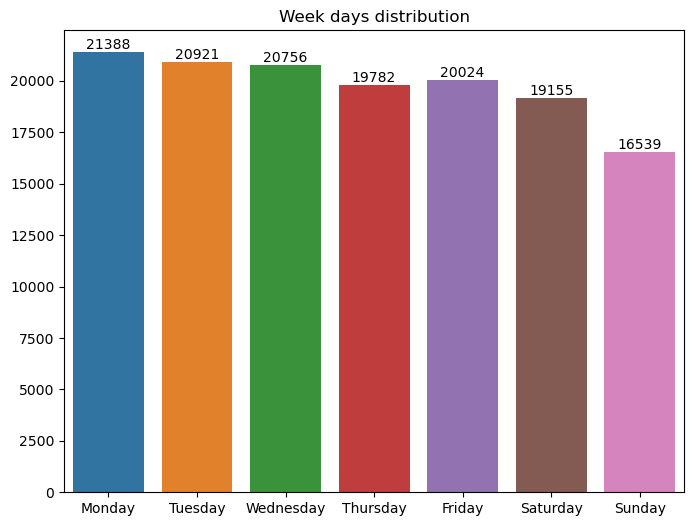

In [26]:
#create copy so that I won't damage original data
days_df = intakes.copy()
#get week days from datetime and set them as ordered categorical
days_df["DateTime"] = days_df["DateTime"].dt.day_name()
order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
days_df['DateTime'] = pd.Categorical(days_df['DateTime'], order)
#plot distribution of individual days
days = days_df["DateTime"].value_counts()
plt.figure(figsize=(8, 6))
ax1 = sns.barplot(x=days.index,y=days.values)
ax1.bar_label(ax1.containers[0])
ax1.set(title="Week days distribution")

Z grafu lze pozorovat, že nejvíce zvířat do útulku přichází v pondělí a poté se počet přichozích postupně snižuje v průběhu týdne. Největší pokles je v neděli.